In [2]:
# lab8_fe.ipynb
# 21 Jun 2025
# Basic Feature Engineering Techniques

Original Data:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who  

/tmp/ipykernel_1215/360823910.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


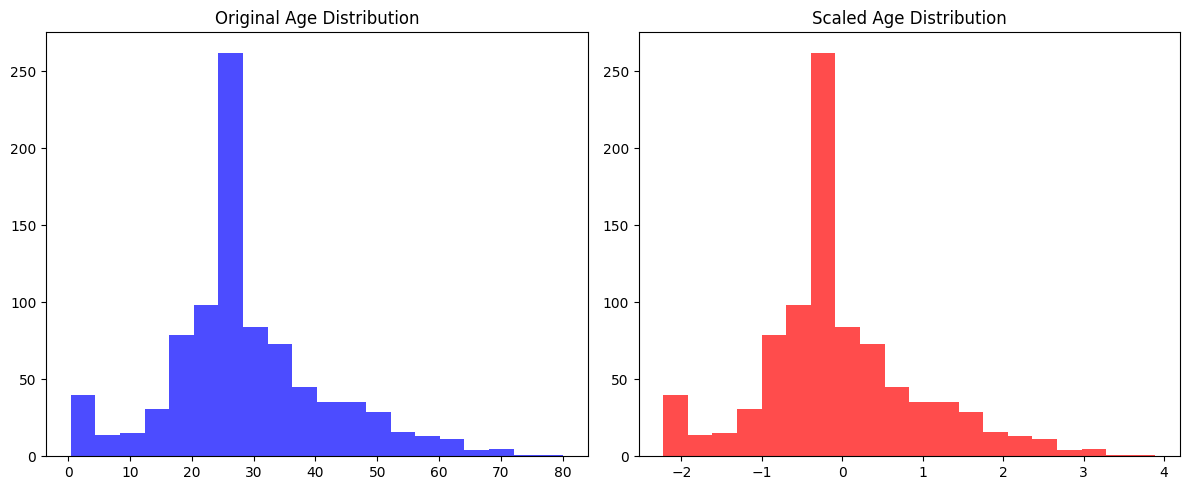

In [4]:
"""
Feature Engineering Demonstration - Corrected Version
This program shows common feature engineering techniques including:
- Handling missing values
- Encoding categorical variables
- Feature scaling
- Creating new features
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
data = pd.read_csv(url)

print("Original Data:")
print(data.head())
print("\nMissing values per column:")
print(data.isnull().sum())

# 1. Handling missing values
# For numerical columns (age, fare), fill with median
imputer = SimpleImputer(strategy='median')
data[['age', 'fare']] = imputer.fit_transform(data[['age', 'fare']])

# For categorical columns (embarked), fill with most frequent value
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop cabin as it has too many missing values and embark_town which we won't use
data.drop(['cabin', 'embark_town'], axis=1, inplace=True, errors='ignore')

# 2. Encoding categorical variables
# One-hot encoding for 'sex' and 'embarked' - updated for newer sklearn versions
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(data[['sex', 'embarked']])
encoded_df = pd.DataFrame(encoded_features, 
                         columns=encoder.get_feature_names_out(['sex', 'embarked']))

# 3. Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['age', 'fare']])
scaled_df = pd.DataFrame(scaled_features, columns=['age_scaled', 'fare_scaled'])

# 4. Creating new features
data['family_size'] = data['sibsp'] + data['parch'] + 1
data['is_alone'] = (data['family_size'] == 1).astype(int)

# Combine all features
final_data = pd.concat([
    data[['pclass', 'family_size', 'is_alone']],
    encoded_df,
    scaled_df,
    data['survived']  # target variable
], axis=1)

print("\nProcessed Data:")
print(final_data.head())

# Visualization: Compare original vs scaled features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=20, color='blue', alpha=0.7)
plt.title('Original Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(final_data['age_scaled'], bins=20, color='red', alpha=0.7)
plt.title('Scaled Age Distribution')

plt.tight_layout()
plt.show()